### Importation Libs :

In [8]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
from tensorflow.keras import models, layers
from tensorflow.keras.callbacks import EarlyStopping
import joblib
import cv2

### Get Data :

In [11]:
Data_URL_Train = '../../Data/train'
Data_URL_Test = '../../Data/test'

trained_data = tf.keras.utils.image_dataset_from_directory(Data_URL_Train, batch_size=32, image_size=(32, 32))
tested_data = tf.keras.utils.image_dataset_from_directory(Data_URL_Test, batch_size=32, image_size=(32, 32))

Found 28709 files belonging to 7 classes.
Found 7178 files belonging to 7 classes.


In [12]:
Class_Name = trained_data.class_names
Class_Name

['angry', 'disgusted', 'fearful', 'happy', 'neutral', 'sad', 'surprised']

### Display Data Examples :

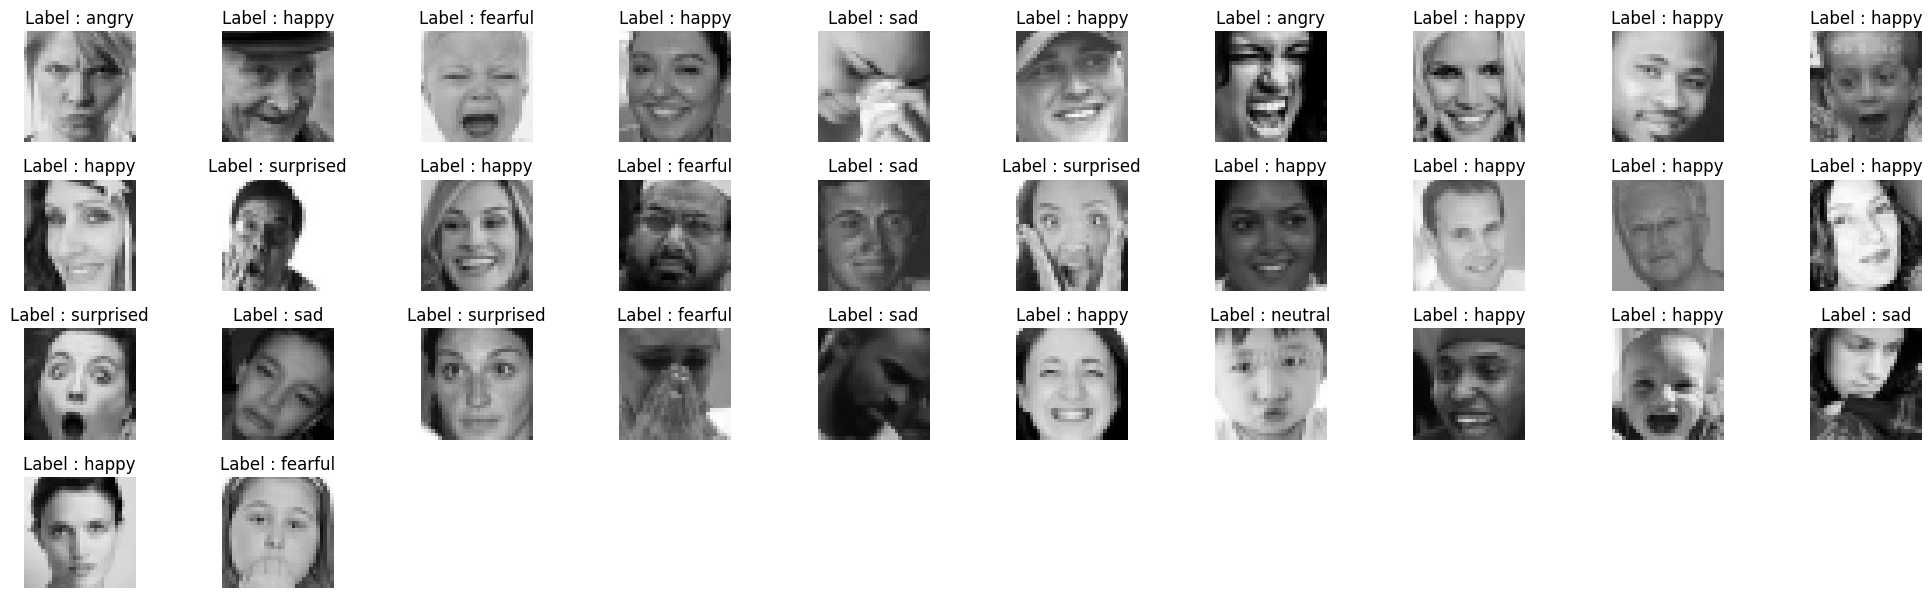

In [17]:
plt.figure(figsize=(20,15))
for images,labels in trained_data.take(1):
    for i in range(len(images)):
        plt.subplot(10, 10, i + 1)
        img = images[i].numpy()
        img = img.astype(np.uint8)
        plt.imshow(img, cmap='twilight')
        plt.title(f"Label : {Class_Name[labels[i].numpy()]}")
        plt.axis('off')

plt.tight_layout()
plt.show()

### Creation List (label, Class Name, Image) :

In [18]:
Class_List = []

for images,labels in trained_data.take(1):
    for i in range(len(images)):
        image = images[i].numpy()
        image = image.astype(np.uint8)
        label = labels[i].numpy()
        Class = Class_Name[label]
        Class_List.append((label, Class,image)) 

Count_element = Counter(T[1] for T in Class_List)

min=float('inf')
for V,C in Count_element.items():
    if C < min :
        min = C

# print(min)
# print(Class_List)

Class_List

[(np.int32(3),
  'happy',
  array([[[ 31,  31,  31],
          [ 21,  21,  21],
          [ 19,  19,  19],
          ...,
          [ 24,  24,  24],
          [ 25,  25,  25],
          [ 22,  22,  22]],
  
         [[ 25,  25,  25],
          [ 20,  20,  20],
          [ 20,  20,  20],
          ...,
          [ 24,  24,  24],
          [ 25,  25,  25],
          [ 24,  24,  24]],
  
         [[ 20,  20,  20],
          [ 18,  18,  18],
          [ 22,  22,  22],
          ...,
          [ 31,  31,  31],
          [ 27,  27,  27],
          [ 24,  24,  24]],
  
         ...,
  
         [[139, 139, 139],
          [130, 130, 130],
          [ 82,  82,  82],
          ...,
          [ 97,  97,  97],
          [103, 103, 103],
          [126, 126, 126]],
  
         [[148, 148, 148],
          [147, 147, 147],
          [134, 134, 134],
          ...,
          [100, 100, 100],
          [112, 112, 112],
          [138, 138, 138]],
  
         [[200, 200, 200],
          [201, 201, 201]

### Display foreach class images :

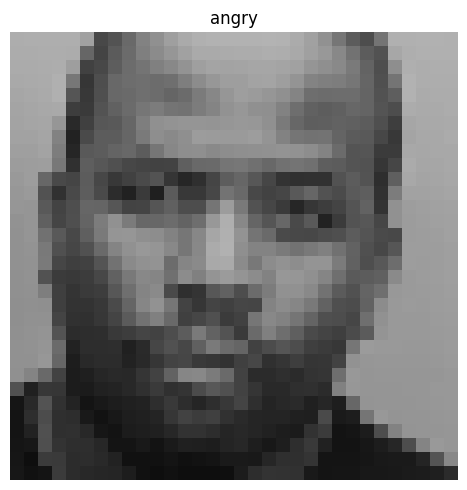

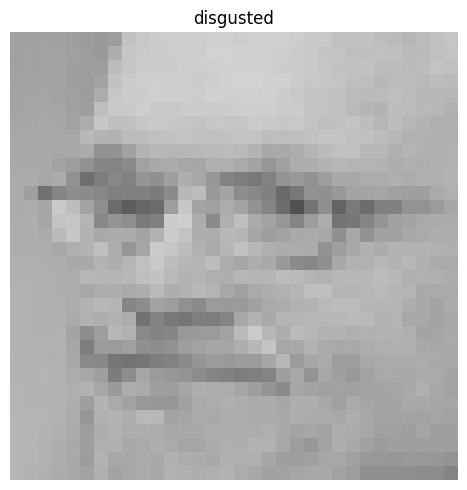

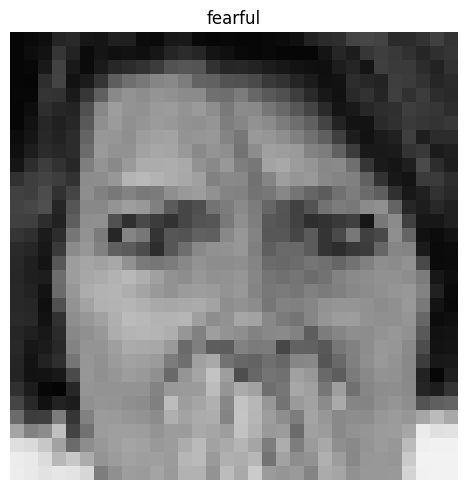

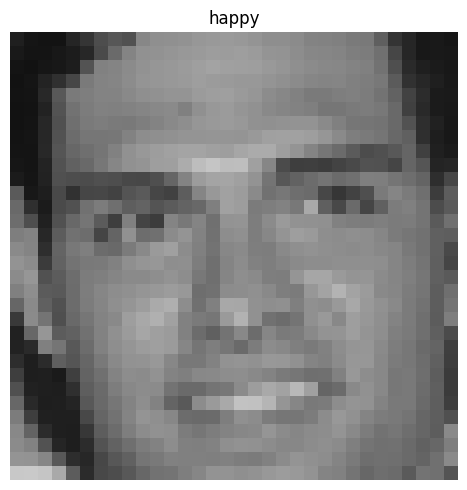

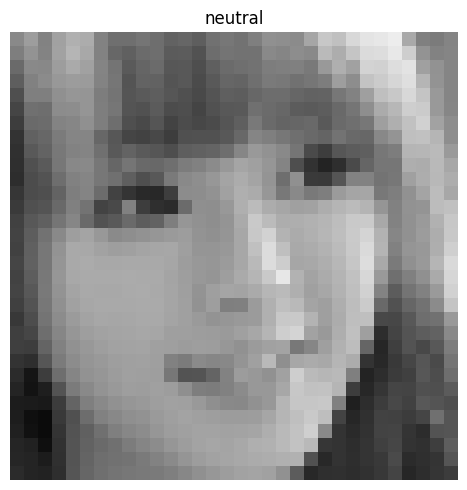

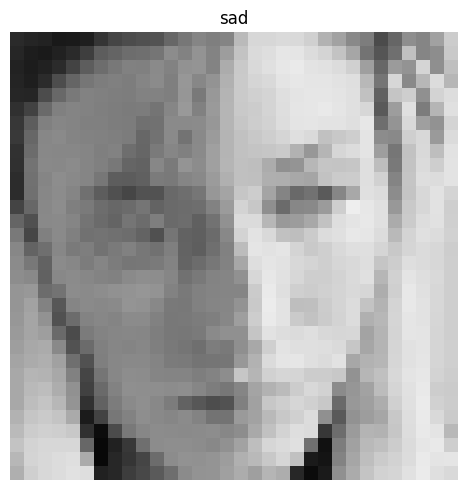

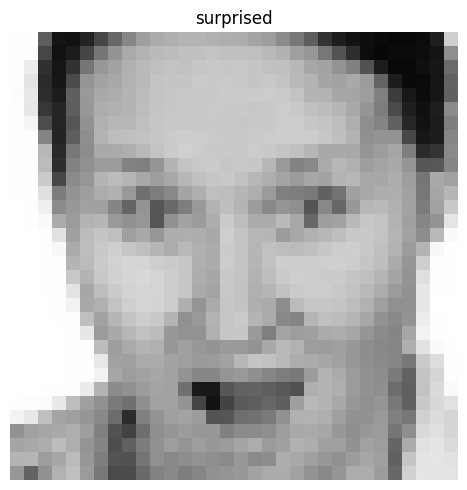

In [19]:
for i in Class_Name:
    plt.figure(figsize=(10, 5))
    plt.title(i)
    count = 0
    for y in range(len(Class_List)):
        if i == Class_List[y][1] and count < min:
            plt.subplot(1, min, count + 1)  
            plt.imshow(Class_List[y][2])
            plt.axis('off')
            count += 1
        plt.axis('off')
    plt.tight_layout()
    plt.show()

In [20]:
def preprocess(image, label):
    image = image / 255.0  
    label = tf.cast(label, tf.int32) 
    label = tf.one_hot(label, depth=7)  
    return image, label

trained_data = trained_data.map(preprocess)
tested_data = tested_data.map(preprocess)

for images,labels in trained_data.take(1):
    print(images[0])

data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1)
])


tf.Tensor(
[[[0.97843134 0.97843134 0.97843134]
  [0.61740196 0.61740196 0.61740196]
  [0.25857842 0.25857842 0.25857842]
  ...
  [0.37132353 0.37132353 0.37132353]
  [0.27941176 0.27941176 0.27941176]
  [0.27132353 0.27132353 0.27132353]]

 [[0.9622549  0.9622549  0.9622549 ]
  [0.6122549  0.6122549  0.6122549 ]
  [0.28431374 0.28431374 0.28431374]
  ...
  [0.5147059  0.5147059  0.5147059 ]
  [0.39558825 0.39558825 0.39558825]
  [0.27279413 0.27279413 0.27279413]]

 [[0.985049   0.985049   0.985049  ]
  [0.68357843 0.68357843 0.68357843]
  [0.3115196  0.3115196  0.3115196 ]
  ...
  [0.52254903 0.52254903 0.52254903]
  [0.44828433 0.44828433 0.44828433]
  [0.2740196  0.2740196  0.2740196 ]]

 ...

 [[0.11862745 0.11862745 0.11862745]
  [0.12818627 0.12818627 0.12818627]
  [0.16176471 0.16176471 0.16176471]
  ...
  [0.25882354 0.25882354 0.25882354]
  [0.3644608  0.3644608  0.3644608 ]
  [0.46887255 0.46887255 0.46887255]]

 [[0.1252451  0.1252451  0.1252451 ]
  [0.1245098  0.1245098  0

### Entrainement du CNN :

In [21]:
model = models.Sequential()
model.add(data_augmentation)
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(7, activation='softmax'))

model.compile(
    optimizer='adam',
    loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

history = model.fit(
    trained_data,
    epochs=25,
)

Epoch 1/25


d:\PythonSimplon\briefs\Détection d’Émotions Faciales\BRF5\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
d:\PythonSimplon\briefs\Détection d’Émotions Faciales\BRF5\Lib\site-packages\keras\src\backend\tensorflow\nn.py:675: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


898/898 ━━━━━━━━━━━━━━━━━━━━ 203s 215ms/step - accuracy: 0.2658 - loss: 1.7749
Epoch 2/25
898/898 ━━━━━━━━━━━━━━━━━━━━ 18s 20ms/step - accuracy: 0.3207 - loss: 1.6922
Epoch 3/25
898/898 ━━━━━━━━━━━━━━━━━━━━ 18s 20ms/step - accuracy: 0.3757 - loss: 1.5979
Epoch 4/25
898/898 ━━━━━━━━━━━━━━━━━━━━ 18s 20ms/step - accuracy: 0.3990 - loss: 1.5438
Epoch 5/25
898/898 ━━━━━━━━━━━━━━━━━━━━ 18s 20ms/step - accuracy: 0.4174 - loss: 1.5006
Epoch 6/25
898/898 ━━━━━━━━━━━━━━━━━━━━ 18s 20ms/step - accuracy: 0.4343 - loss: 1.4668
Epoch 7/25
898/898 ━━━━━━━━━━━━━━━━━━━━ 19s 21ms/step - accuracy: 0.4438 - loss: 1.4424
Epoch 8/25
898/898 ━━━━━━━━━━━━━━━━━━━━ 19s 21ms/step - accuracy: 0.4530 - loss: 1.4154
Epoch 9/25
898/898 ━━━━━━━━━━━━━━━━━━━━ 19s 21ms/step - accuracy: 0.4644 - loss: 1.3948
Epoch 10/25
898/898 ━━━━━━━━━━━━━━━━━━━━ 18s 20ms/step - accuracy: 0.4707 - loss: 1.3806
Epoch 11/25
898/898 ━━━━━━━━━━━━━━━━━━━━ 18s 20ms/step - accuracy: 0.4761 - loss: 1.3628
Epoch 12/25
898/898 ━━━━━━━━━━━━━━━━━━━

### Evaluate Model :

In [22]:
Loss,acc = model.evaluate(tested_data)
print(acc)

225/225 ━━━━━━━━━━━━━━━━━━━━ 38s 166ms/step - accuracy: 0.5070 - loss: 1.2994
0.5069657564163208


### Save Model :

In [23]:
File_Name = 'Model.dump'
joblib.dump(model, File_Name)
loaded_model = joblib.load(File_Name)

### Model Test Prediction (Images):

In [13]:
Face_Cascade = cv2.CascadeClassifier('../Haarcascade/haarcascade_frontalface_default.xml')

def detectMultiScale(Myimage):

    face_image = Myimage.copy()
    face_rect = Face_Cascade.detectMultiScale(face_image, scaleFactor=1.2, minNeighbors=5)

    for (x, y, w, h) in face_rect:

        cv2.rectangle(face_image, (x, y), (x + w, y + h), (255, 255, 255), 2)

        face = face_image[y:y+h, x:x+w]
    
        Detection = face
        Detection_resize = cv2.resize(Detection, (32,32))
        Detection_resize = np.expand_dims(Detection_resize, axis=0)


        My_Model = joblib.load('../Model/Model.dump')
        Prediction = My_Model.predict(Detection_resize)
        Predict = list(Prediction[0])
        index_i = Predict.index(max(Predict))
        Last_pred = (f"{Class_Name[index_i]} : {max(Predict):.2f}")

        cv2.putText(face_image,str(Last_pred), (x-10, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 204, 255), 2, cv2.LINE_AA)


    return face_image

if Face_Cascade.empty():
    print('Script Not Loaded !!')
else:
    Test_Image = cv2.imread('../../Picture16 (1).png')
    Pred = detectMultiScale(Test_Image)
    cv2.imshow('Prediction', Pred)

    cv2.waitKey(0)
    cv2.destroyAllWindows()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


### Predict With Video Live :

In [14]:

cam = cv2.VideoCapture(0)

frame_width = int(cam.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cam.get(cv2.CAP_PROP_FRAME_HEIGHT))

fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter('output.mp4', fourcc, 20.0, (frame_width, frame_height))

while True:
    ret, frame = cam.read()

    out.write(frame)

    face_rect = Face_Cascade.detectMultiScale(frame, scaleFactor=1.2, minNeighbors=5)

    for (x, y, w, h) in face_rect:

        cv2.rectangle(frame, (x, y), (x + w, y + h), (255, 255, 255), 2)

        face = frame[y:y+h, x:x+w]
    
        Detection = face
        Detection_resize = cv2.resize(Detection, (32,32))
        Detection_resize = np.expand_dims(Detection_resize, axis=0)


        My_Model = joblib.load('../Model/Model.dump')
        Prediction = My_Model.predict(Detection_resize)
        Predict = list(Prediction[0])
        index_i = Predict.index(max(Predict))
        Last_pred = (f"{Class_Name[index_i]} : {max(Predict):.2f}")

        cv2.putText(frame,str(Last_pred), (x-10, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 204, 255), 2, cv2.LINE_AA)

    cv2.imshow('Camera', frame)

    if cv2.waitKey(1) == ord('q'):
        break

cam.release()
out.release()
cv2.destroyAllWindows()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 276ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s